In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re

from glob import glob
from uncertainties import ufloat
from collections import OrderedDict

In [2]:
n = 0

In [3]:
def plot(x, y, y_err, title, y_label, color):
    
    plt.figure(figsize=(12, 6))
    plt.xticks(x)
    plt.grid(True)
    
    plt.errorbar(x, y, yerr=y_err, fmt="o", color=color)

    plt.title(title)
    plt.xlabel("Liczba procesów")
    plt.ylabel(y_label)

    global n
    n +=1
    plt.savefig(f"{n}")
    plt.show()

In [4]:
def time_plot(data, title):
    plot(
        x=[x for x in data],
        y=[t.nominal_value for _, t in data.items()],
        y_err=[t.std_dev for _, t in data.items()],
        title=title,
        y_label="Czas trwania [s]",
        color="green",
    )

In [5]:
def speedup_plot(data, title):
    t_1 = data[1]
    
    if "skal" in title:
        speedup = [p*t_1/t for p, t in data.items()]
    else:
        speedup = [t_1/t for _, t in data.items()]
        
    plot(
        x=[x for x in data],
        y=[s.nominal_value for s in speedup],
        y_err=[s.std_dev for s in speedup],
        title=title,
        y_label="Przyśpieszenie",
        color="red",
    )
    

In [6]:
def efficiency_plot(data, title):
    t_1 = data[1]
    if "skal" in title:
        speedup = [p*t_1/t for p, t in data.items()]
    else:
        speedup = [t_1/t for _, t in data.items()]
        
    efficiency = [s/p for p, s in zip(data, speedup)]
    
    plot(
        x=[x for x in data],
        y=[e.nominal_value for e in efficiency],
        y_err=[e.std_dev for e in efficiency],
        title=title,
        y_label="Efektywność",
        color="blue",
    )
    

In [7]:
def serial_fraction_plot(data, title):
    t_1 = data[1]
    if "skal" in title:
        speedup = [p*t_1/t for p, t in data.items()]
    else:
        speedup = [t_1/t for _, t in data.items()]
        
    serial_fraction = [(1/speedup[p-1] - 1/p)  /  (1 - 1/p) for p, t in data.items() if p > 1 ]
    
    plot(
        x=[x for x in data if x > 1],
        y=[s.nominal_value for s in serial_fraction],
        y_err=[s.std_dev for s in serial_fraction],
        title=title,
        y_label="Metryka Karpa-Flatta",
        color="orange",
    )
    

In [8]:
def title(file_name):
    if "SCALABLE" in file_name:
        mode =  "Problem skalowalny"
    else:
        mode = "Stały rozmiar problemu"
        
    return f"Liczba iteracji: {file_name[:5]}, {mode}"

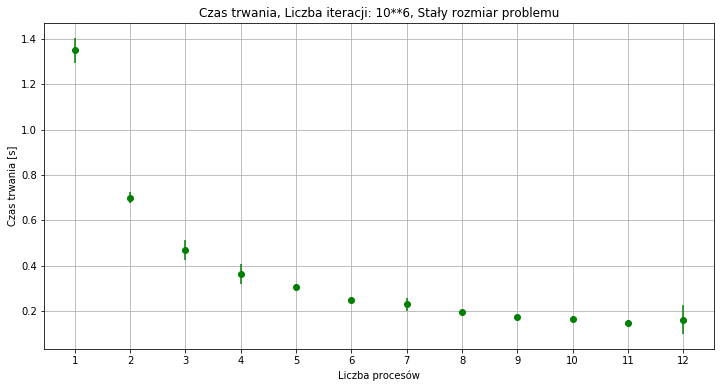

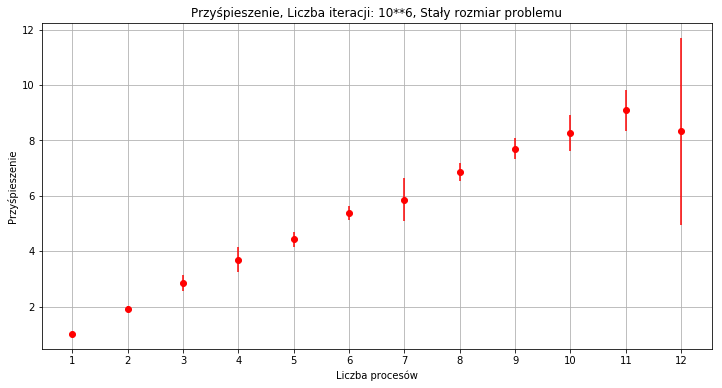

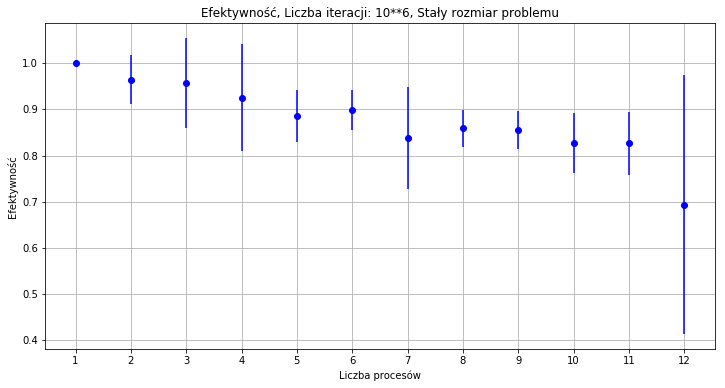

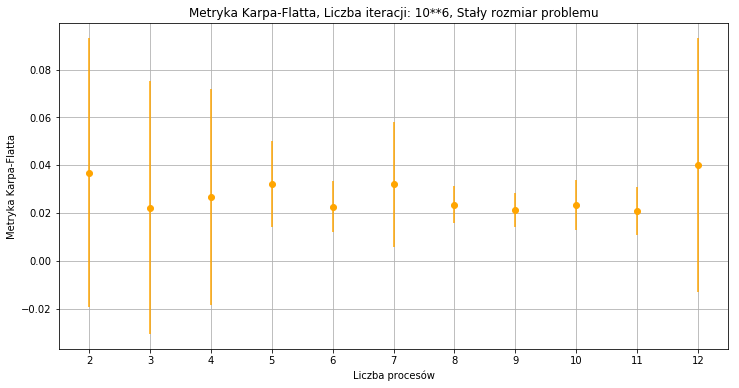

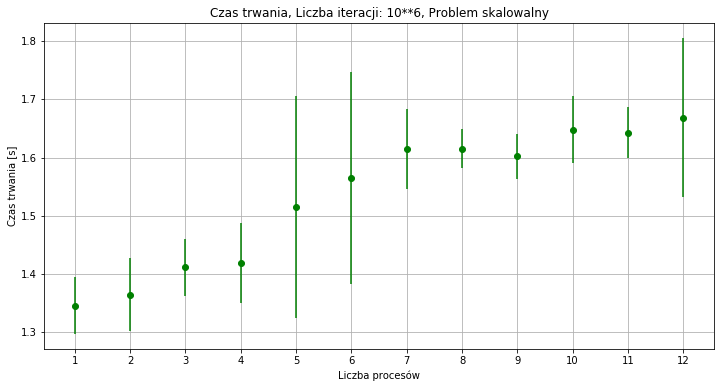

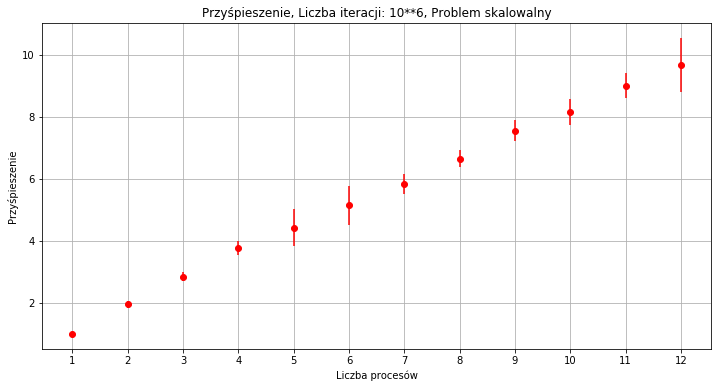

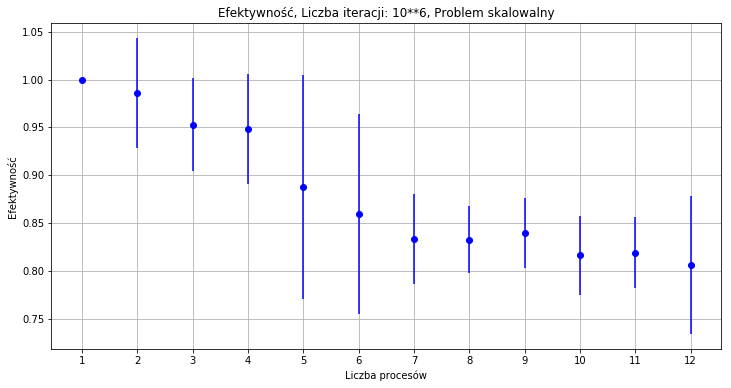

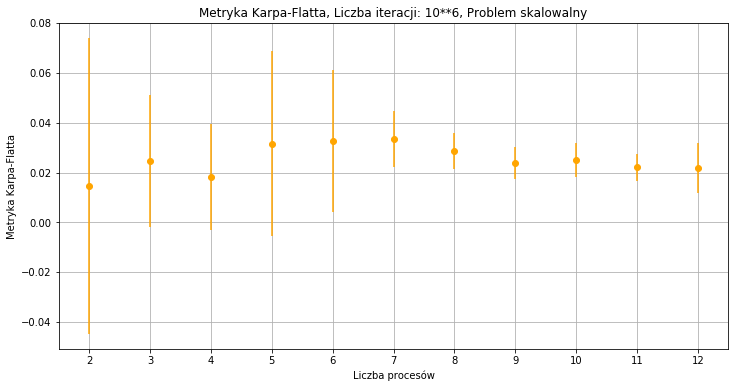

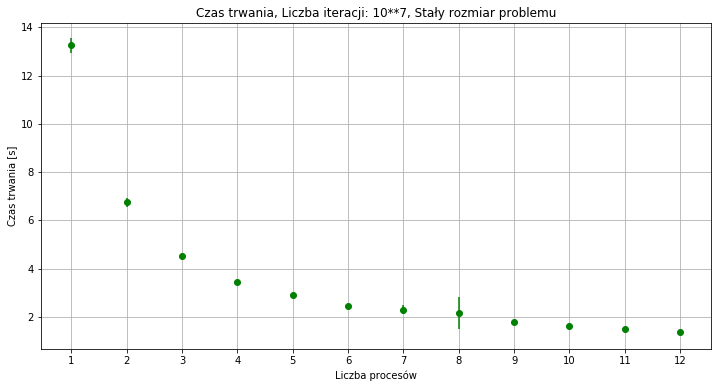

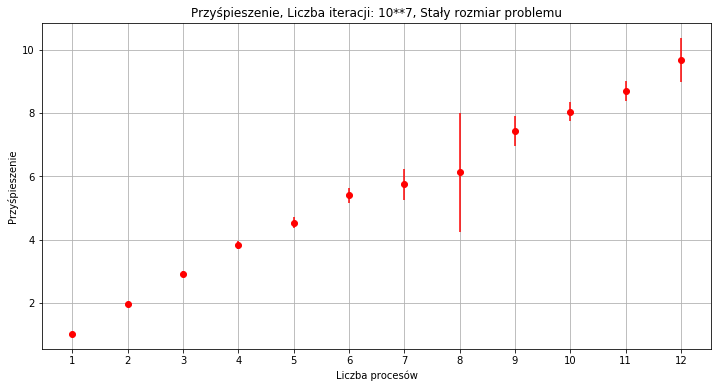

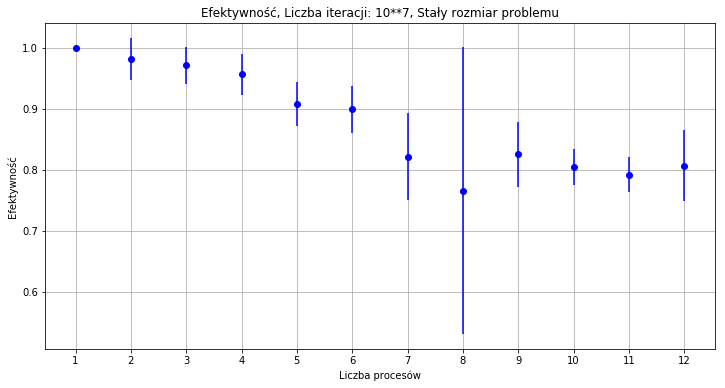

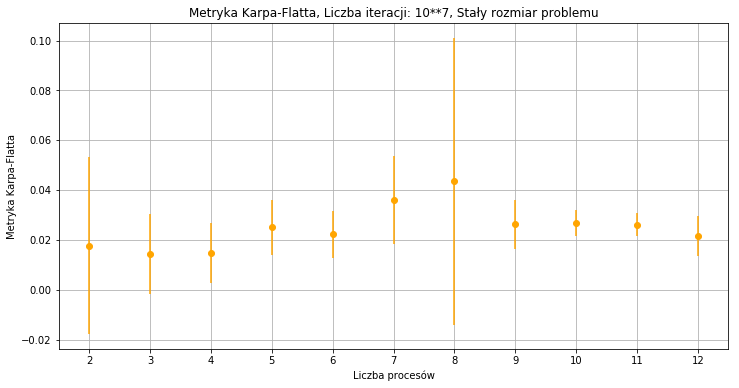

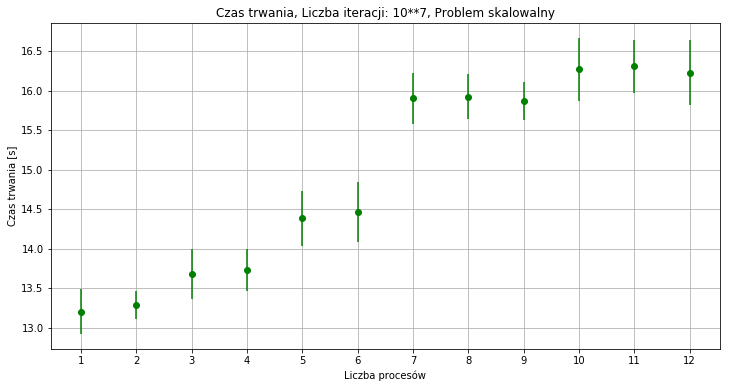

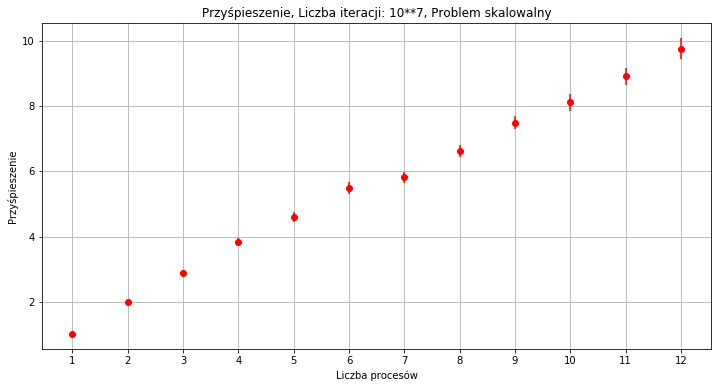

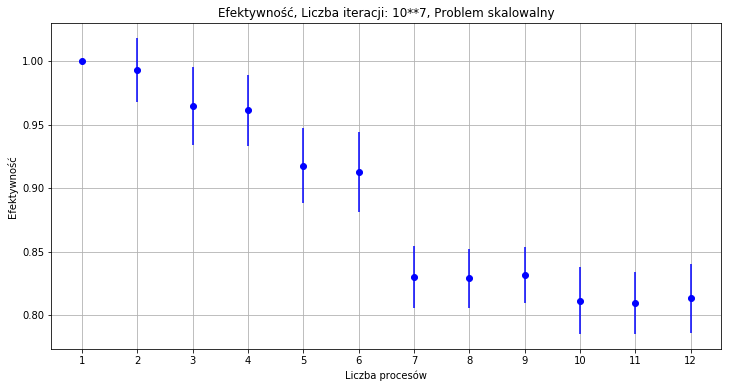

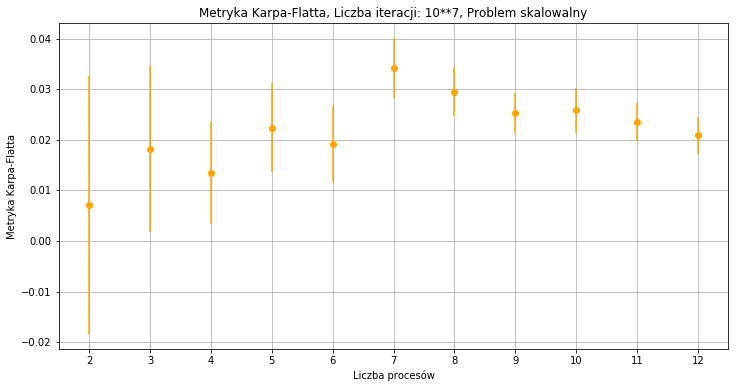

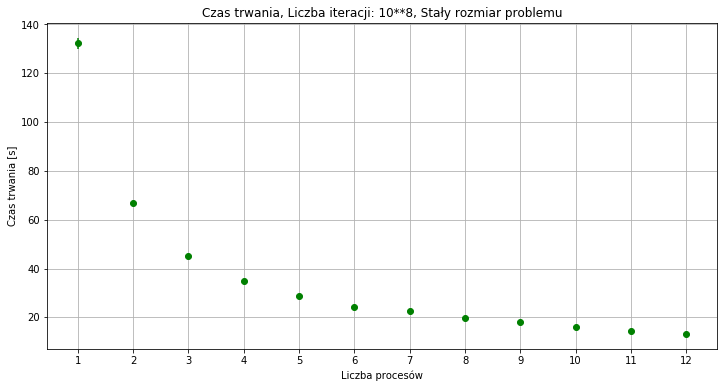

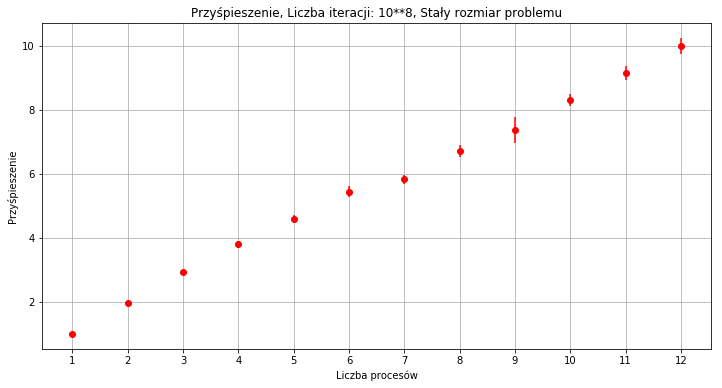

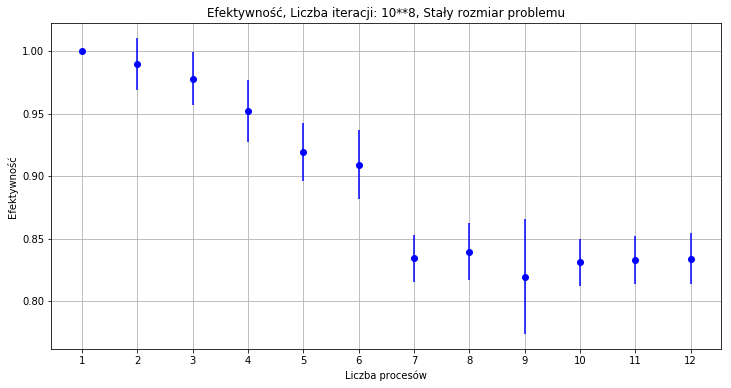

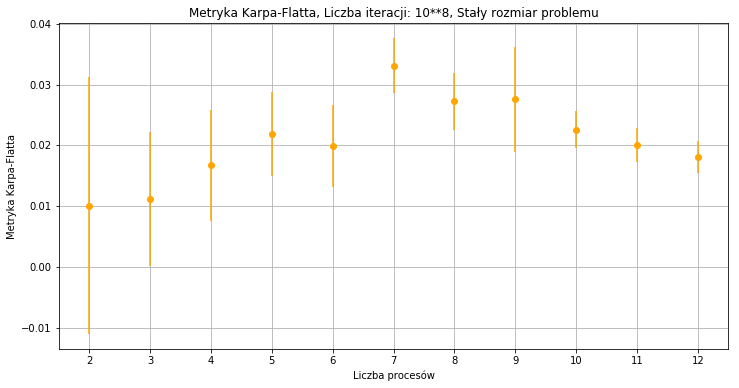

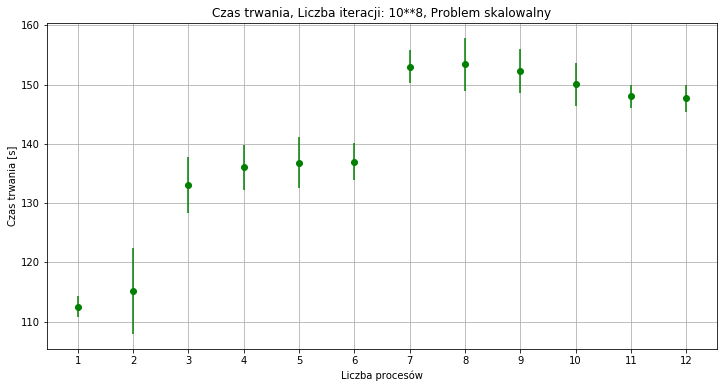

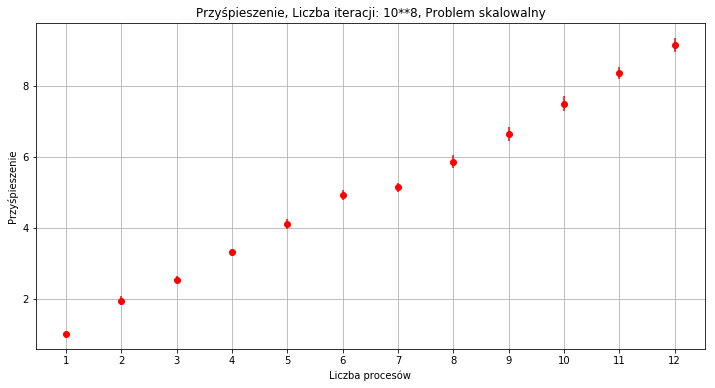

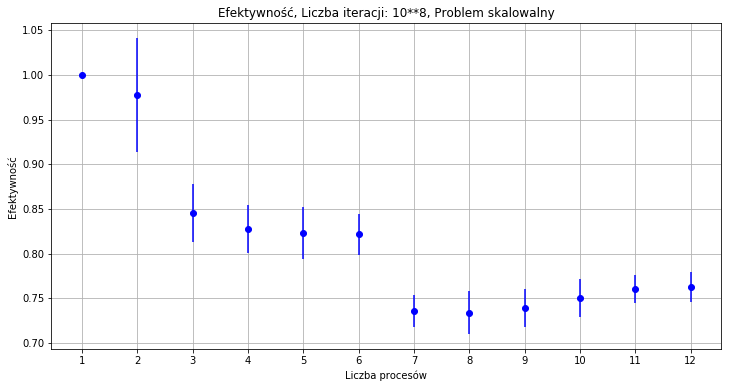

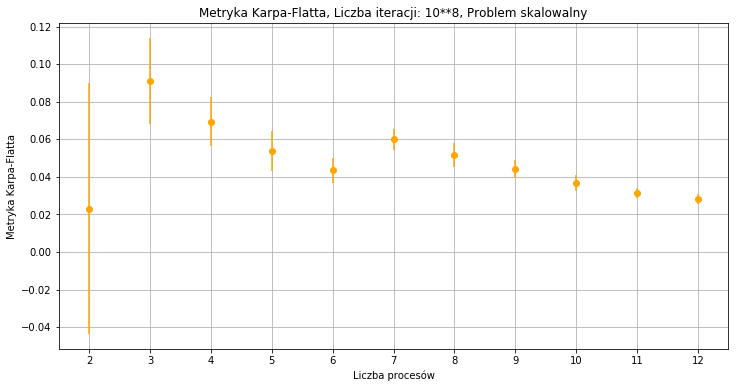

In [9]:
for m in sorted(glob("*.csv")):
    t = title(m)
    rows = open(m, "r").readlines()[1:]
    
    def row_to_floats(row):
        return [float(x) for x in row.split(",")[1:]]
    
    data = OrderedDict({
        int(row.split(",")[0]): ufloat(np.mean(row_to_floats(row)), np.std(row_to_floats(row)))
        for row in rows
    })
    
    
    time_plot(data, "Czas trwania, "+ t)
    speedup_plot(data, "Przyśpieszenie, "+ t)
    efficiency_plot(data, "Efektywność, "+ t)
    serial_fraction_plot(data, "Metryka Karpa-Flatta, "+ t)

    